## Titanic_project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

### Importing Library

In [198]:
#database

import numpy as np
import pandas as pd

#visualization

import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#metrices

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#tunning

from sklearn.model_selection import GridSearchCV

#save

import pickle

import warnings

warnings.filterwarnings('ignore')

Importing Dataset:

In [98]:
link='https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'
data=pd.read_csv(link)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
data.shape

(891, 12)

Data set have 891 rows and 12 features including target variable 'Survived'.
In target Survive:
1-Survive
0-death
Feature Name and Ticket are nominal so we can remove.
Few others categorical feature are there will treat them.

0    549
1    342
Name: Survived, dtype: int64


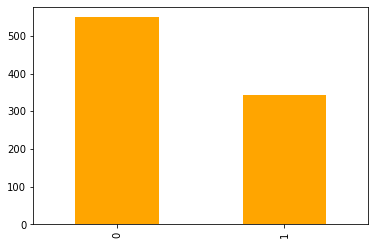

In [100]:
#Testing imbalance

print(data['Survived'].value_counts())
data['Survived'].value_counts().plot(kind='bar',color='orange')

plt.show()

There is not much diffrence between both classifer so no imbalance.
0    549
1    342

### Dataset Info:

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observations:
1-feature Name, sex, Ticket, cabin, embarked are numeric.
2-Age, Cabin, Embarked having Nan value
3-Cabin feature having 77% Nan value so no need to treat this much values, so will remove it.

In [101]:
#Droping 4 feature -2 nominal, 1 id & 1 feature with 77%

data.drop(columns=['Name','Ticket','Cabin','PassengerId'],inplace=True)

In [102]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [103]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [104]:
#treating categorigal column 'Sex'- 1 for male, 0 for female.

enc=LabelEncoder()
data['Sex']=enc.fit_transform(data['Sex'])

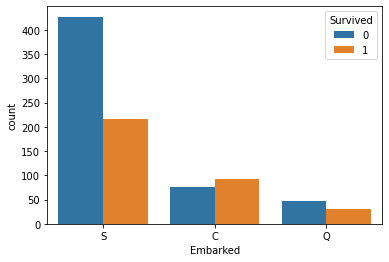

In [105]:
sns.countplot(x=data['Embarked'],hue=data['Survived'])

plt.show()

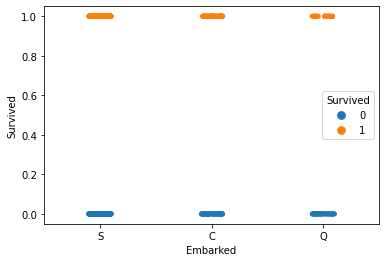

In [106]:
sns.stripplot(x=data['Embarked'],y=data['Survived'],hue=data['Survived'])

plt.show()

No relationship found feature Emabarked so we can drop it.

In [107]:
data.drop(columns=['Embarked'],inplace=True)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [109]:
#testing & treating null

data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [110]:
#imputing age using knn imputer

from sklearn.impute import KNNImputer

imp=KNNImputer()

new_age=imp.fit_transform(data[['Age']])

In [111]:
data['Age']=np.round(new_age,1)

### Data Describe

In [112]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699327,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.001940,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.400000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.700000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


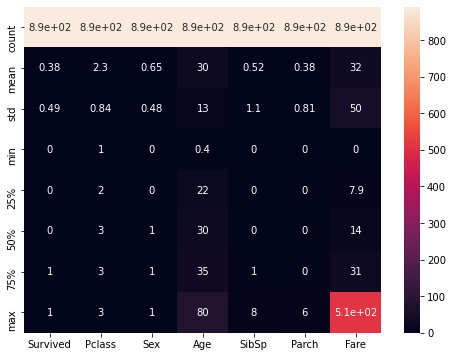

In [113]:
plt.figure(figsize=(8,6))
sns.heatmap(data.describe(),annot=True)
plt.show()

Dataset has no null values now. will check relationship.

### Correlation & multicollinearity using heatmap

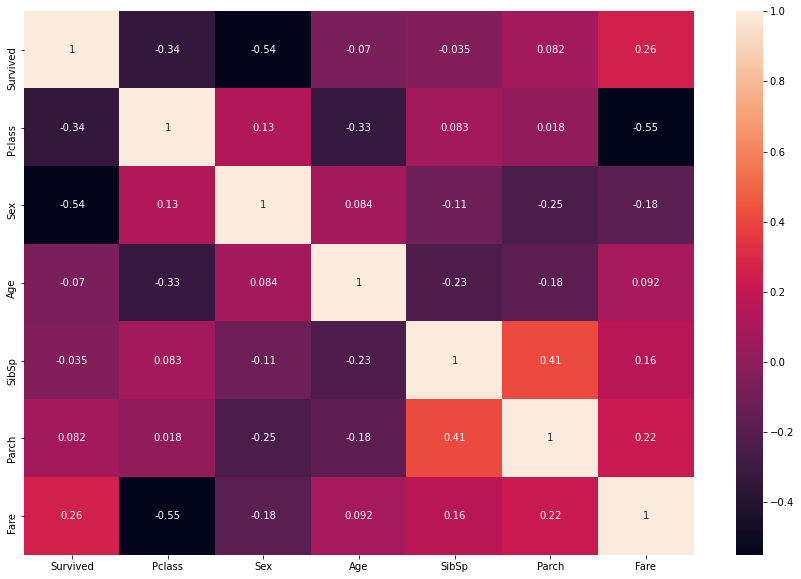

In [114]:
data_corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data_corr,annot=True)
plt.show()

In [ ]:
Observations:
No multicollinearity found in features.
fare having maximum postive relationship with target.
pclass,sex showing negative relationship

### Scatterplot to check  relationship

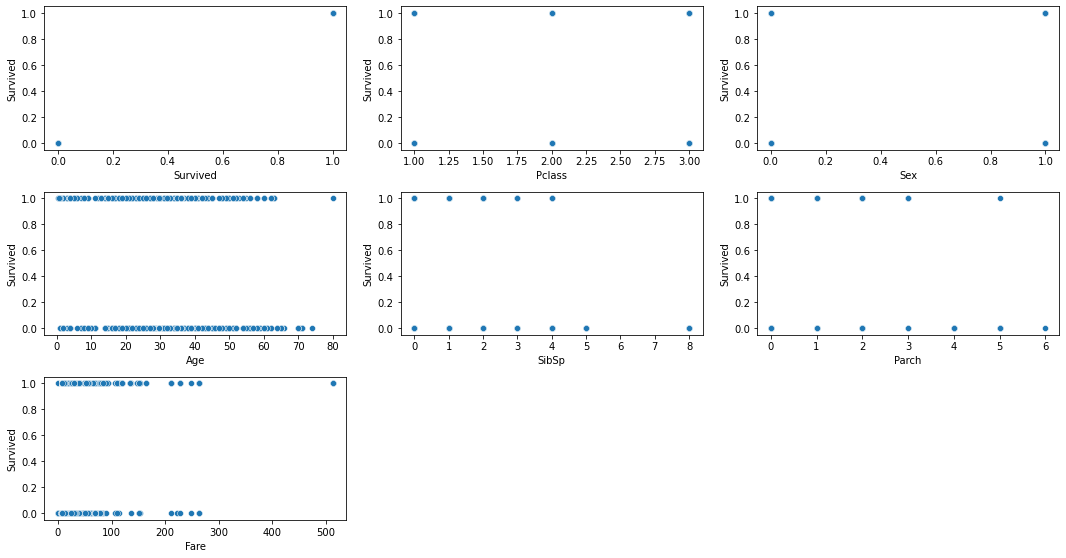

In [137]:
plt.figure(figsize=(15,10))
plotnumber=1

for col in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.scatterplot(data[col],data['Survived'])
        
    plotnumber+=1
    
plt.tight_layout()

### Testing data distribution/skewness using distplot

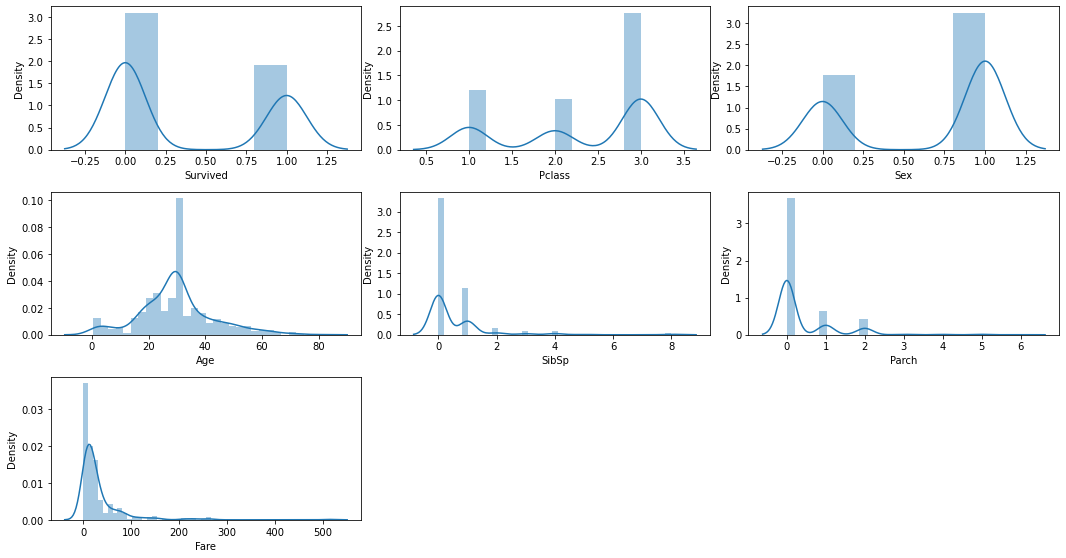

In [126]:
plt.figure(figsize=(15,10))
plotnumber=1

for col in data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[col])
        
    plotnumber+=1
    
plt.tight_layout()

skewness is showing in several features but range is too low so not removing any outliers.
will try to reduce skewness using zscore.

Skewness reducing using z_score

In [138]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434486
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [143]:
from scipy.stats import zscore
z=zscore(data)

In [144]:
data_new=data[(z<=3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(891, 7)
(820, 7)


In [147]:
#loss data percentage after removing outliers:
print((891-820)/891*100)

7.968574635241302


As we are lossing around 8% data in case of outlier removal, we have very limited data so cant afford any data loss will continue with orignal data.

In [ ]:
Power transformation to remove skewness

In [151]:
#from sklearn.preprocessing import power_transform

In [156]:
#dataset split

X=data.drop(columns=['Survived'])
y=data.Survived

In [153]:
# X_new=power_transform(X)
# X=pd.DataFrame(X_new,columns=X.columns)

### Scaling Features

In [158]:
scale=StandardScaler()
x_scale=scale.fit_transform(X)

### Model Building

In [ ]:
# testing best random state
for i in range(10,100,1):
    x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_test)

    print(accuracy_score(y_test,y_pred)*100,i)


In [ ]:
#found 89 is best random state

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.20,random_state=89)

In [184]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

print('Logistic Regression Model scoring:',accuracy_score(y_test,y_pred)*100)

Logistic Regression Model scoring: 84.91620111731844


### Getting accuracy score around 85% using linear regression  will try few other algorithm to improve score

In [188]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()

dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)

SVC()

In [189]:
#svc score
y_pred=svc.predict(x_test)

print('SVC Model scoring:',accuracy_score(y_test,y_pred)*100)

SVC Model scoring: 86.59217877094973


In [190]:
#random forest score
y_pred=rf.predict(x_test)

print('Random Forest scoring:',accuracy_score(y_test,y_pred)*100)

Random Forest scoring: 86.03351955307262


In [191]:
#decision tree score
y_pred=dt.predict(x_test)

print('Decision Tree scoring:',accuracy_score(y_test,y_pred)*100)

Decision Tree scoring: 79.3296089385475


### Since we are getting best score 86.6% with svc will try to improve its score further tunning params:

In [194]:
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       113
           1       0.88      0.74      0.80        66

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



### Hyperparametertunning

In [195]:
svc=SVC()

In [199]:

params={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
       }

grd=GridSearchCV(svc,param_grid=params)

grd.fit(x_train,y_train)
print(grd.best_params_)

svc=grd.best_estimator_
svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print(classification_report(y_test,y_pred))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       113
           1       0.91      0.74      0.82        66

    accuracy                           0.88       179
   macro avg       0.89      0.85      0.86       179
weighted avg       0.88      0.88      0.87       179



### Cross Validation

In [200]:
from sklearn.model_selection import cross_val_score

In [211]:
cv_score=cross_val_score(svc,x_scale,y,cv=5)

In [212]:
cv_score.mean()

0.828278199736363

Cross_validation score is 83%

In [216]:
filename='Titanic_practice.pickle'
pickle.dump(rf, open(filename,'wb'))

### Final score we achived 88% after tunning with SVC Algorithm.